## Machine Learning model for  Boston House Prices 
Dataset available at: https://www.kaggle.com/vikrishnan/boston-house-prices

This dataset contains information of Boston suburbs and town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

### Attributes
CRIM per capita crime rate by town 

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# attributing dataset to a dataframe
boston = pd.read_csv('housing.csv')
boston.head(10)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
5,0.08829 12.50 7.870 0 0.5240 6.0120 66...
6,0.14455 12.50 7.870 0 0.5240 6.1720 96...
7,0.21124 12.50 7.870 0 0.5240 5.6310 100...
8,0.17004 12.50 7.870 0 0.5240 6.0040 85...
9,0.22489 12.50 7.870 0 0.5240 6.3770 94...


In [3]:
# this dataset has 505 rowx and 1 column
boston.shape

(505, 1)

In [4]:
# changing the name of the columns accordingly
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
# reading the file with the new columns assigned
boston1 = pd.read_csv('housing.csv', header=None, delim_whitespace=True, names=column_names)
boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
boston1.shape

(506, 14)

In [7]:
# This dataset contain 14 features on 506 houses. We want to predcit the MEDV feature, which is the avg value owner in $K
# checking the variable types: all ints and floats
boston1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# checking for missing data
# there are no missing values 
boston1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Finding which features are useful for prediction

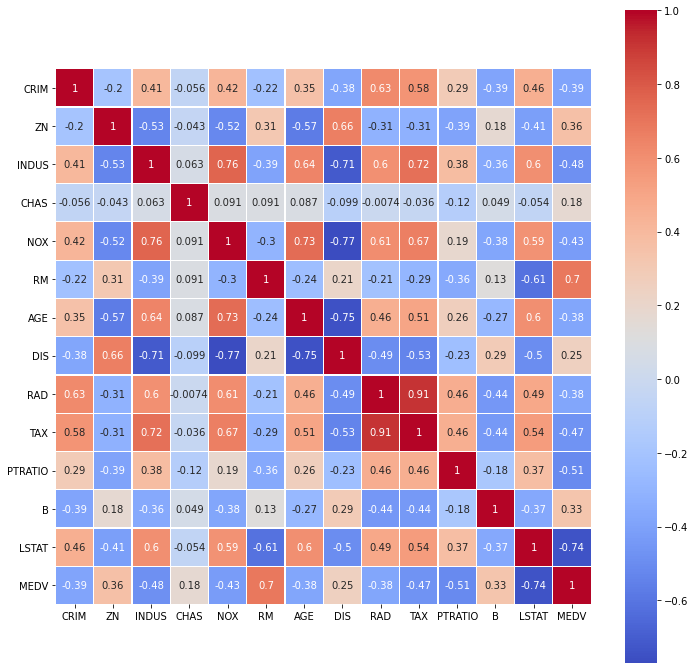

In [9]:
# building a heatmap for corrrlation
# annot = True gives the numbers on the corr matrix
# linewidths=0.2 make the lines larger for better visualization
# cmap='coolwarm' facilitates visualization through collors
# square = True asserts the legend into the heatmap properly
plt.figure(figsize=(12,12))
sns.heatmap(data=boston1.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True)


In [10]:
# selecting variables with strong correlation (+- 0.4) with MEDV (closer to 1 OR -1):
# LSTAT, RM, PTRATIO, TAX
# creating a new dataframe with the featues I'm interested in
boston2 = boston1[['LSTAT', 'RM', 'PTRATIO', 'TAX', 'MEDV']]
boston2.head()

,LSTAT,RM,PTRATIO,TAX,MEDV
0,4.98,6.575,15.3,296.0,24.0
1,9.14,6.421,17.8,242.0,21.6
2,4.03,7.185,17.8,242.0,34.7
3,2.94,6.998,18.7,222.0,33.4
4,5.33,7.147,18.7,222.0,36.2


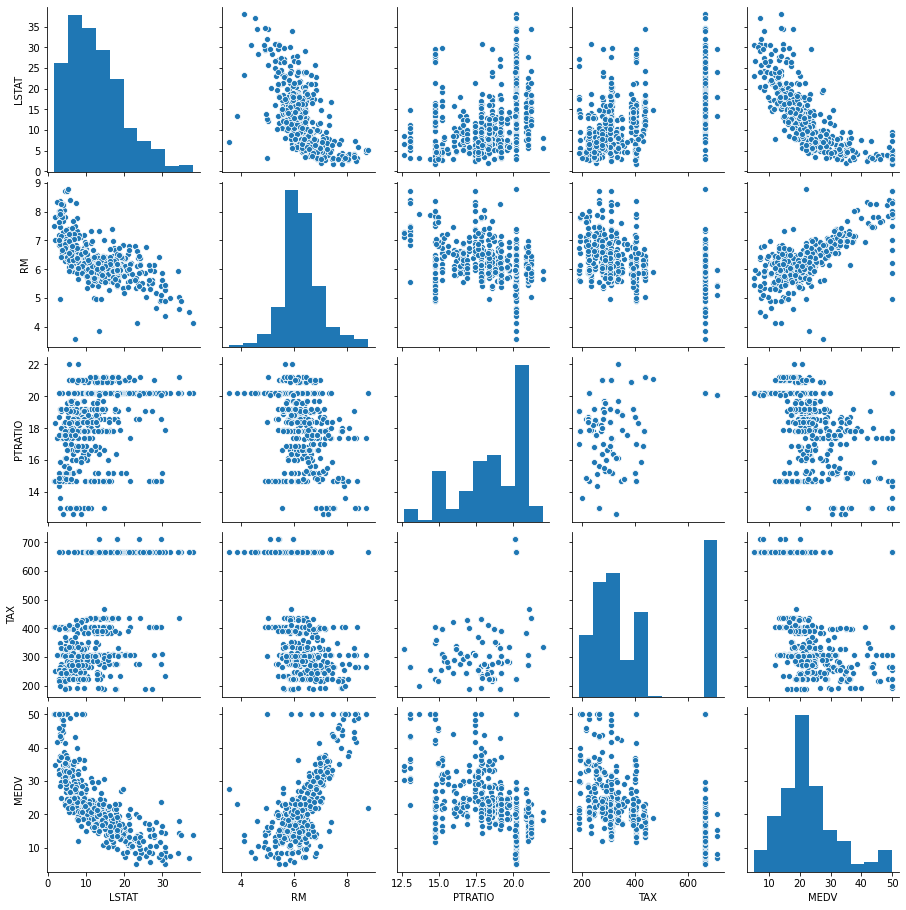

In [11]:
# visually seeing the distribution to check relationships
sns.pairplot(data=boston2)

#### Observations
-MEDV, LSTAT and RM seems normally distributed

-RM and LSTAT seems to have a good linear relationship with MEDV

-there are outliers in this dataset

In [12]:
# using describe() to check for statiscal measures
# LSTAT and MEDV have maximun values much larger than 75% of the dataset (outliers)
desc = boston2.describe().T
print(desc)

         count        mean         std      min       25%       50%       75%  \
LSTAT    506.0   12.653063    7.141062    1.730    6.9500   11.3600   16.9550   
RM       506.0    6.284634    0.702617    3.561    5.8855    6.2085    6.6235   
PTRATIO  506.0   18.455534    2.164946   12.600   17.4000   19.0500   20.2000   
TAX      506.0  408.237154  168.537116  187.000  279.0000  330.0000  666.0000   
MEDV     506.0   22.532806    9.197104    5.000   17.0250   21.2000   25.0000   

            max  
LSTAT     37.97  
RM         8.78  
PTRATIO   22.00  
TAX      711.00  
MEDV      50.00  


### Treating outliers

Text(0.5, 1.0, 'Boxplot of MEDV')

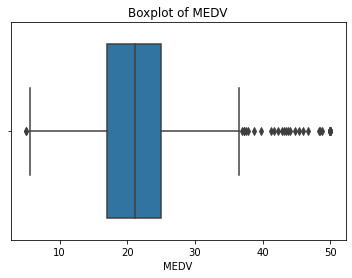

In [13]:
# Boxplot and Distribution plot for dependent variable MEDV
sns.boxplot(boston2['MEDV'])
plt.title('Boxplot of MEDV')

Text(0.5, 1.0, 'Distribution Plot MEDV')

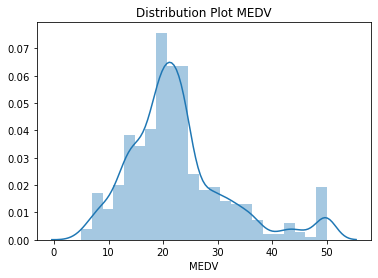

In [14]:
sns.distplot(a=boston2['MEDV'])
plt.title('Distribution Plot MEDV')

-MEDV is normally distributed

-contains potential outliers

### Formula for outliers (Tukey)
Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR


Q3 -> Quartile 3, Under which 75% of data lies

Q1 -> Quartile 1, Under which 25% of data lies

IQR -> Inter-Quartile Range, Q3 - Q1

In [15]:
MEDV_Q3 = desc['MEDV']['75%'] # MEDV Q3 is the 75% of the describe() method
MEDV_Q1 = desc['MEDV']['25%'] # MEDV Q1 is the 25% of the describe method
MEDV_IQR = MEDV_Q3 - MEDV_Q1 # designating the subtraction to a variable
MEDV_UV = MEDV_Q3 + 1.5*MEDV_IQR # applying the formula to find the upper point
MEDV_LV = MEDV_Q1 - 1.5*MEDV_IQR # applying the formula to find the lower point

In [16]:
# sort_values for upper point
boston2[boston2['MEDV']>MEDV_UV].sort_values(by=['MEDV','RM'])

,LSTAT,RM,PTRATIO,TAX,MEDV
190,5.10,6.951,15.2,398.0,37.0
179,5.04,6.980,17.8,193.0,37.2
291,3.56,7.148,19.2,245.0,37.3
226,3.13,8.040,17.4,307.0,37.6
182,4.82,7.155,17.8,193.0,37.9
97,4.21,8.069,18.0,276.0,38.7
180,7.56,7.765,17.8,193.0,39.8
157,4.59,6.943,14.7,403.0,41.3
232,2.47,8.337,17.4,307.0,41.7
202,3.11,7.610,14.7,348.0,42.3


Observing houses with MEDV = 50, we see that:

- RM ranges from 4 to 9, which is a lot of variance.
- TAX has a lot divergion as well, going from low to high
- decision: DROP ALL values with MEDV = 50 cause they appear to be outliers

In [17]:
# dropping MEDV = 50 with boston2[~(boston2['MEDV']==50)]
print(f'Shape of dataset before removing Outliers: {boston2.shape}')
boston3= boston2[~(boston2['MEDV']==50)]
print(f'Shape of dataset after removing Outliers: {boston3.shape}')

Shape of dataset before removing Outliers: (506, 5)
Shape of dataseh after removing Outliers: (490, 5)


### Spliting data to train the model: Linear regression

In [18]:
# importing necessary libraries
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [19]:
# after receiving the msg: Reshape your data either using array.reshape(-1, 1)
# we reshape the data like below
X_rm = boston3.iloc[:,:-1].values
y_medv = boston3.iloc[:,-1].values

In [20]:
# splitting data into train and test with train_test_split
X_rm_treino, X_rm_test, y_medv_treino, y_medv_test = train_test_split(X_rm, y_medv, test_size=0.3, random_state=42)

### Creating the model with train dataset

In [21]:
modelo = linear_model.LinearRegression()

In [22]:
# linear regression formula: (Y = A + B.X)
# training the model to obtain the values of A and B 
modelo.fit(X_rm_treino, y_medv_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Executing the model on test dataset

In [23]:
predict_medv = modelo.predict(X_rm_test)

In [24]:
# metrics to analyse the success of the model 
from math import sqrt
print(f'Sum of squared error (SSE): {np.sum((predict_medv - y_medv_test)**2)}') # SSE: sum all of the  residuals and square them. 
print(f'Mean squared error (MSE): {mean_squared_error(y_medv_test, predict_medv)}') # MSE: avg of SSE
print(f'Mean absolute error (MAE): {mean_absolute_error(y_medv_test, predict_medv)}')
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(y_medv_test, predict_medv))}') # RMSE: sqrt of the MSE
print(f'R2-score: {r2_score(predict_medv, y_medv_test)}') # r2-score: explains the variance of the variable Y when it comes to X

Sum of squared error (SSE): 2126.7238850559374
Mean squared error (MSE): 14.467509422149234
Mean absolute error (MAE): 3.001110895629565
Sqrt of mean squared error (RMSE):  3.803617938509234
R2-score: 0.607312092110627


All of the metrics above help evaluate the acuracy of the model. MAE and RMSE are below 4, which means the distance between the real value and the predicted value is below 4 - a satisfatory result.

r2, for instance, is 0.60: this means that our linear regression model (values A and B given) is able to explain 60% of the variance between the MEDV value and the number of rooms in houses located in Boston. 

The usual benchmark for this metric is 0.70.